# BestNormalize

### The goal of this notebook is to help Data Scientists solve a common problem in Machine Learning projects - "normalizing" the distribution of numerical variables.

Much has been written about the theoretical advantages of dealing with numerical variables that follow a Gaussian distribution. For some algorithms - Linear and Logistic Regression - this is a clear requirement; for many others, it is just helpful. 

The goal of the BestNormalize class is to reduce the time Data Scientists spend looking for the best way to make a numerical transformation more Gaussian-like by automating this process. In this notebook, "normalizing" refers to this process, rather than transforming the variable to a 0-1 scale. Like any other tool, it might not work in 100% of the cases, but for most of them it will provide a fairly reasonable answer.

For ease of use, this class follows an API pattern fairly similar to those of scikit-learn - the fit_transform method. When called, this method runs a number of different possible transformations to the numerical variables of the dataset and records the score. Then, it applies the transformation with the best score.

#### Disclaimer: This library is similar to the bestNormalize library in R, although it does not support cross-validation of results at this time.

Let's demonstrate a simple use case of this library with the famous housing dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
housing = pd.read_csv('datasets/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This dataset contains a number of numerical variables. Let's plot the histograms of the numeric variables to check for normality of the distributions. For obvious reasons we will keep latitude and longitude out of this analysis.

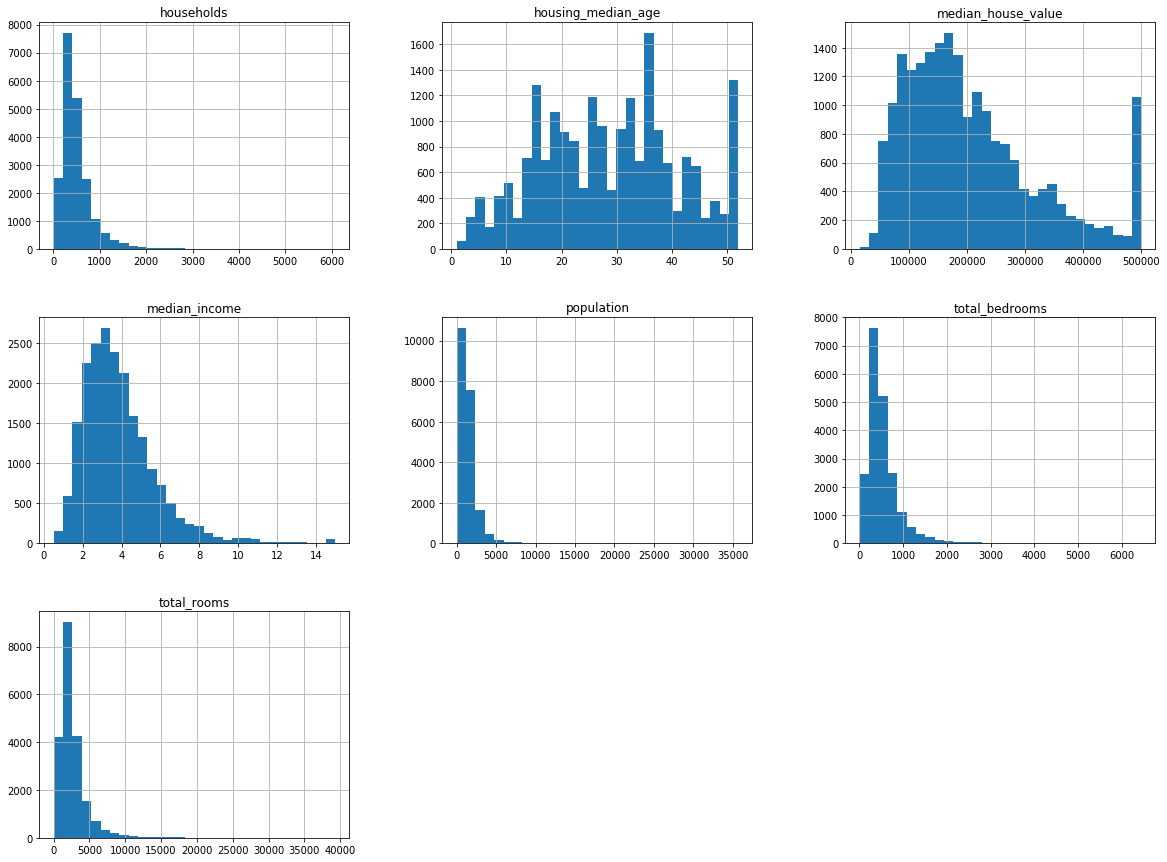

In [15]:
housing_num = housing.select_dtypes(include=np.number).drop(['latitude','longitude'], axis=1)
housing_num.hist(bins=30, figsize=(20,15))
plt.show()

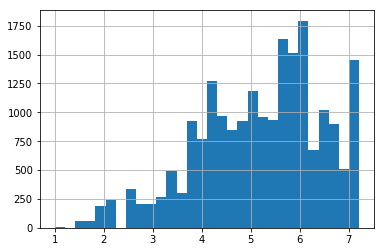

In [17]:
np.sqrt(housing['housing_median_age']).hist(bins=30)

In [20]:
np.sqrt(housing['housing_median_age']).count()

20640

It seems that none of the numerical variables follow very Gaussian-like distributions. It is feasible that for modelling purposes it would be useful to apply transformations to the distributions. Let's use the **BestNormalize** class for that purpose.

In [5]:
from best_normalize import BestNormalize

In [7]:
bestNormalize = BestNormalize()
housing_num_transformed = bestNormalize.fit_transform(housing_num)

In [8]:
housing_num_transformed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.991031,-1.352623,-1.694923,-1.697037,-1.639539,1.303064,1.500150
1,NaN,1.815667,1.466763,1.191955,1.621478,1.298702,1.087053
2,1.362418,-0.651824,-1.334066,-1.315958,-1.324958,1.091619,1.053012
3,1.362418,-0.872291,-1.059682,-1.174755,-1.068522,0.686906,0.993438
4,1.362418,-0.468669,-0.773140,-1.164444,-0.810910,-0.012954,0.998508


In [9]:
bestNormalize.best_scores

,Variable,Transformation,Score,Approx. Normal?
41,households,quantile,0.183767,True
8,housing_median_age,sqrt,777.755861,False
52,median_house_value,arcsin,359.544184,False
46,median_income,yeo-johnson,8.177807,False
34,population,quantile,0.185808,True
27,total_bedrooms,quantile,0.213173,True
20,total_rooms,quantile,0.181337,True


In [10]:
bestNormalize.scores

,Variable,Transformation,Score,Approx. Normal?
0,housing_median_age,original,1770.127173,False
1,total_rooms,original,18461.958386,False
2,total_bedrooms,original,15680.951552,False
3,population,original,21882.808473,False
4,households,original,15709.280182,False
5,median_income,original,7083.203770,False
6,median_house_value,original,2430.931051,False
7,housing_median_age,log,3003.772701,False
8,housing_median_age,sqrt,777.755861,False
9,housing_median_age,exp,14820.756101,False


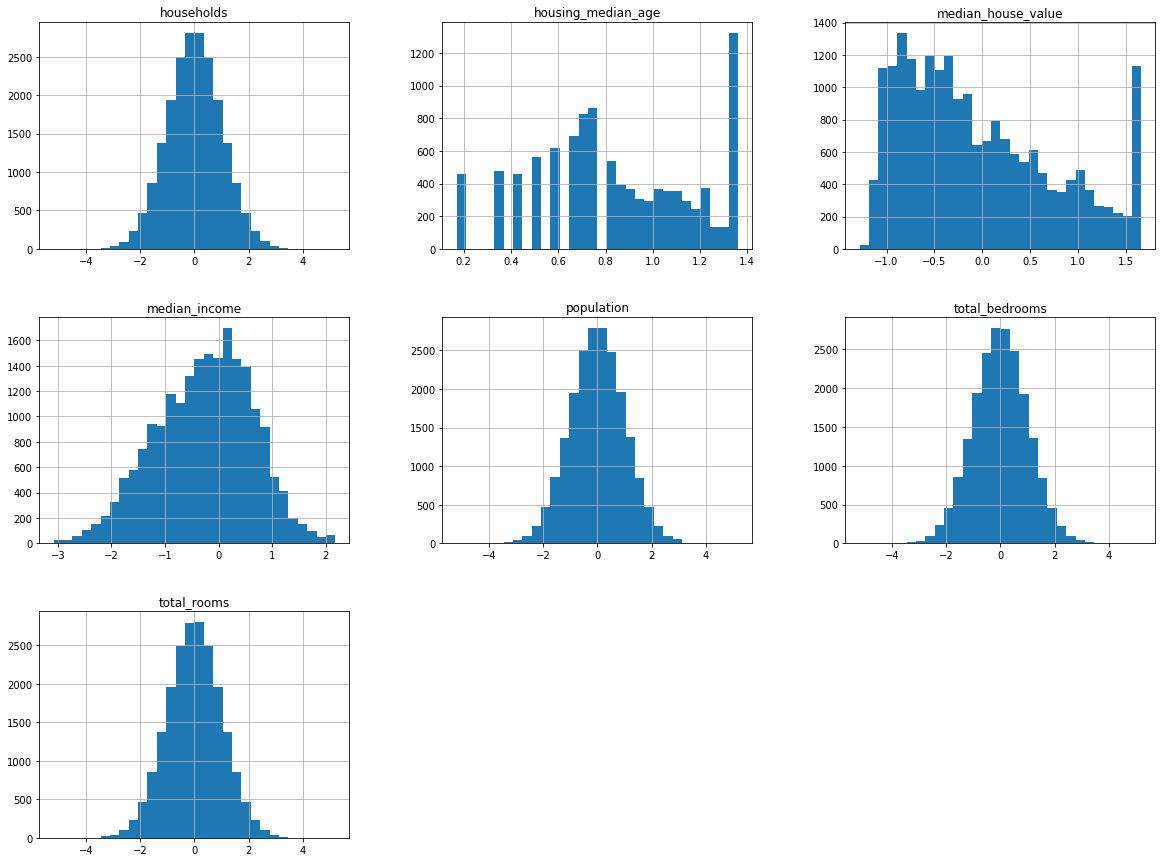

In [11]:
housing_num_transformed.hist(bins=30, figsize=(20,15))
plt.show()

In [12]:
housing_num_transformed.count()

housing_median_age    10432
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
dtype: int64

In [ ]:
bestNormalize.best_scores

In [ ]:
best_scores = scores.iloc[scores.groupby('Variable')['Score'].idxmin()]

In [ ]:
best_scores